In [38]:
import math
import numpy as np
import pandas as pd
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from sklearn.feature_selection import RFE
from datetime import datetime
import smtplib

# Create one random seed number for reproducible results
seedNum = 888

In [3]:
#Timer
startTimeScript = datetime.now()
xy_original = pd.read_csv("train.csv")
list = np.arange(5000,36191,1)
xy_original =  xy_original.drop(list)
xy_original.drop(167,inplace = True)
xy_original.columns = xy_original.columns.str.replace(' ','')

# Dropping the two non-predictive attributes: url and timedelta
xy_original.drop('url', axis=1, inplace=True)
xy_original.drop('timedelta', axis=1, inplace=True)
xy_original.drop('id', axis=1, inplace=True)

In [4]:
xy_original

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,6.0,47.0,0.914894,1.0,0.964286,1.0,1.0,0.0,2.0,4.744681,...,0.350000,0.350,-0.200000,-0.200000,-0.200000,0.443939,-0.015152,0.056061,0.015152,1170.0
1,7.0,181.0,0.519337,1.0,0.644231,5.0,2.0,1.0,0.0,4.613260,...,0.136364,1.000,-0.400000,-0.400000,-0.400000,0.000000,0.000000,0.500000,0.000000,6265.0
2,9.0,862.0,0.465089,1.0,0.635478,16.0,0.0,1.0,0.0,4.725058,...,0.050000,1.000,-0.264444,-0.750000,-0.100000,0.000000,0.000000,0.500000,0.000000,121.0
3,10.0,1015.0,0.447503,1.0,0.636986,12.0,2.0,1.0,0.0,4.434483,...,0.100000,1.000,-0.277083,-0.800000,-0.008333,0.000000,0.000000,0.500000,0.000000,841.0
4,8.0,129.0,0.666667,1.0,0.790123,3.0,0.0,1.0,0.0,4.674419,...,0.100000,0.375,-0.393333,-0.700000,-0.166667,0.000000,0.000000,0.500000,0.000000,376.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11.0,190.0,0.577143,1.0,0.663717,3.0,2.0,1.0,0.0,4.700000,...,0.100000,0.700,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,754.0
4996,9.0,218.0,0.540404,1.0,0.508876,23.0,1.0,20.0,1.0,5.541284,...,0.083333,0.900,-0.155556,-0.155556,-0.155556,0.750000,0.291667,0.250000,0.291667,18946.0
4997,11.0,931.0,0.406725,1.0,0.571963,3.0,2.0,1.0,0.0,4.870032,...,0.100000,0.600,-0.328993,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,526.0
4998,11.0,113.0,0.766355,1.0,0.911765,3.0,2.0,0.0,1.0,4.681416,...,0.300000,0.850,-0.172222,-0.400000,-0.100000,1.000000,0.500000,0.500000,0.500000,2507.0


In [5]:
# Use variable totCol to hold the number of columns in the dataframe
totCol = len(xy_original.columns)

# Set up variable totAttr for the total number of attribute columns
totAttr = totCol-1

In [6]:
# targetCol variable indicates the column location of the target/class variable
# If the first column, set targetCol to 1. If the last column, set targetCol to totCol
# If (targetCol <> 1) and (targetCol <> totCol), be aware when slicing up the dataframes for visualization
targetCol = totCol

# Standardize the class column to the name of targetVar if the column name is known
xy_original.rename(columns={'shares': 'targetVar'}, inplace=True)

In [7]:
nf=pd.read_csv('validation.csv')
nf.columns = nf.columns.str.strip()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
id                               1000 non-null int64
url                              1000 non-null object
timedelta                        1000 non-null int64
n_tokens_title                   1000 non-null int64
n_tokens_content                 1000 non-null int64
n_unique_tokens                  1000 non-null float64
n_non_stop_words                 1000 non-null float64
n_non_stop_unique_tokens         1000 non-null float64
num_hrefs                        1000 non-null int64
num_self_hrefs                   1000 non-null int64
num_imgs                         1000 non-null int64
num_videos                       1000 non-null int64
average_token_length             1000 non-null float64
num_keywords                     1000 non-null int64
data_channel_is_lifestyle        1000 non-null int64
data_channel_is_entertainment    1000 non-null int64
data_channel_is_bus              1000

In [8]:
nf.drop(['id'],axis=1,inplace=True)
nf.drop(['url','timedelta'],axis=1,inplace=True)

In [9]:
nf.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,11,611,0.500000,1.0,0.591940,44,2,0,0,5.135843,...,0.100000,0.8,-0.299038,-0.75,-0.1875,0.233333,-0.250000,0.266667,0.250000,NaN
1,12,1302,0.459224,1.0,0.639949,28,5,5,8,4.570661,...,0.062500,1.0,-0.192460,-0.40,-0.0500,0.677273,0.468182,0.177273,0.468182,NaN
2,9,857,0.487242,1.0,0.642586,12,4,1,0,5.122520,...,0.033333,0.6,-0.141667,-0.25,-0.1000,0.000000,0.000000,0.500000,0.000000,NaN
3,11,43,0.930233,1.0,0.966667,2,1,0,1,5.209302,...,0.250000,0.5,-0.800000,-1.00,-0.6000,0.000000,0.000000,0.500000,0.000000,NaN
4,10,394,0.558673,1.0,0.764706,8,1,1,0,4.421320,...,0.050000,1.0,-0.209414,-0.50,-0.0250,1.000000,0.000000,0.500000,0.000000,NaN


In [10]:
# We create training datasets (xy_train, x_train, y_train) for various operations
# We create validation datasets (xy_test, x_test, y_test) for various operations
# Use 70% of the data to train the models and the remaining for testing/validation
#array = xy_original.values

if targetCol == totCol :
    x_original = xy_original.iloc[:,0:totAttr]
    y_original = xy_original.iloc[:,totAttr]
else :
    x_original = xy_original.iloc[:,1:totCol]
    y_original = xy_original.iloc[:,0]

validation_size = 0.30
x_train, x_test, y_train, y_test = train_test_split(x_original, y_original, test_size=validation_size, random_state=seedNum)
print("x_original.shape: {} y_original.shape: {}".format(x_original.shape, y_original.shape))
print("x_train.shape: {} y_train.shape: {}".format(x_train.shape, y_train.shape))
print("x_test.shape: {} y_test.shape: {}".format(x_test.shape, y_test.shape))

x_original.shape: (4999, 58) y_original.shape: (4999,)
x_train.shape: (3499, 58) y_train.shape: (3499,)
x_test.shape: (1500, 58) y_test.shape: (1500,)


In [19]:
# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 3
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1
    
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

In [11]:
xy_original.head(10)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,targetVar
0,6.0,47.0,0.914894,1.0,0.964286,1.0,1.0,0.0,2.0,4.744681,...,0.350000,0.350,-0.200000,-0.20,-0.200000,0.443939,-0.015152,0.056061,0.015152,1170.0
1,7.0,181.0,0.519337,1.0,0.644231,5.0,2.0,1.0,0.0,4.613260,...,0.136364,1.000,-0.400000,-0.40,-0.400000,0.000000,0.000000,0.500000,0.000000,6265.0
2,9.0,862.0,0.465089,1.0,0.635478,16.0,0.0,1.0,0.0,4.725058,...,0.050000,1.000,-0.264444,-0.75,-0.100000,0.000000,0.000000,0.500000,0.000000,121.0
3,10.0,1015.0,0.447503,1.0,0.636986,12.0,2.0,1.0,0.0,4.434483,...,0.100000,1.000,-0.277083,-0.80,-0.008333,0.000000,0.000000,0.500000,0.000000,841.0
4,8.0,129.0,0.666667,1.0,0.790123,3.0,0.0,1.0,0.0,4.674419,...,0.100000,0.375,-0.393333,-0.70,-0.166667,0.000000,0.000000,0.500000,0.000000,376.0
5,9.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,2.0,0.000000,...,0.000000,0.000,0.000000,0.00,0.000000,1.000000,0.500000,0.500000,0.500000,16034.0
6,8.0,234.0,0.595652,1.0,0.746377,12.0,4.0,1.0,0.0,4.594017,...,0.500000,0.500,-0.135714,-0.20,-0.071429,0.300000,0.250000,0.200000,0.250000,2116.0
7,10.0,437.0,0.527907,1.0,0.708502,5.0,2.0,2.0,0.0,4.681922,...,0.100000,0.600,-0.314286,-1.00,-0.050000,0.687500,-0.062500,0.187500,0.062500,1577.0
8,10.0,289.0,0.614035,1.0,0.769231,6.0,1.0,1.0,0.0,4.775087,...,0.136364,0.600,-0.312500,-0.50,-0.125000,0.727273,0.068182,0.227273,0.068182,961.0
9,11.0,154.0,0.678322,1.0,0.721649,2.0,2.0,10.0,0.0,4.584416,...,0.100000,1.000,-0.377083,-0.80,-0.125000,0.750000,-0.150000,0.250000,0.150000,1169.0


In [12]:
xy_original.shape

(4999, 59)

In [13]:
xy_original.dtypes

n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max                       float64
kw_min_avg                       float64
kw_max_avg      

In [14]:
xy_original.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,targetVar
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,...,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,10.371274,546.376675,0.529410,0.969594,0.672402,10.710142,3.266253,4.622324,1.122625,4.543135,...,0.094523,0.759233,-0.256771,-0.516276,-0.105706,0.279158,0.069219,0.345690,0.153652,3387.399280
std,2.109209,465.597539,0.137335,0.171719,0.154460,11.061191,3.727960,8.265562,3.812424,0.851621,...,0.071821,0.248004,0.125902,0.288669,0.091543,0.325873,0.261728,0.188279,0.222891,8212.777156
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,26.000000
25%,9.000000,247.000000,0.468594,1.000000,0.623536,4.000000,1.000000,1.000000,0.000000,4.475069,...,0.050000,0.600000,-0.326667,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,949.000000
50%,10.000000,413.000000,0.538813,1.000000,0.691358,7.000000,2.000000,1.000000,0.000000,4.660870,...,0.100000,0.800000,-0.250000,-0.500000,-0.100000,0.100000,0.000000,0.500000,0.000000,1480.000000
75%,12.000000,713.500000,0.605860,1.000000,0.753589,13.000000,4.000000,4.500000,1.000000,4.855472,...,0.100000,1.000000,-0.183333,-0.300000,-0.050000,0.500000,0.136364,0.500000,0.250000,2760.500000
max,20.000000,7413.000000,0.952381,1.000000,1.000000,171.000000,62.000000,108.000000,75.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,205149.000000


In [15]:
xy_original.isnull().sum()

n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_shares        0
self_reference_avg_s

In [16]:
x_original = xy_original.drop(columns=['targetVar'])

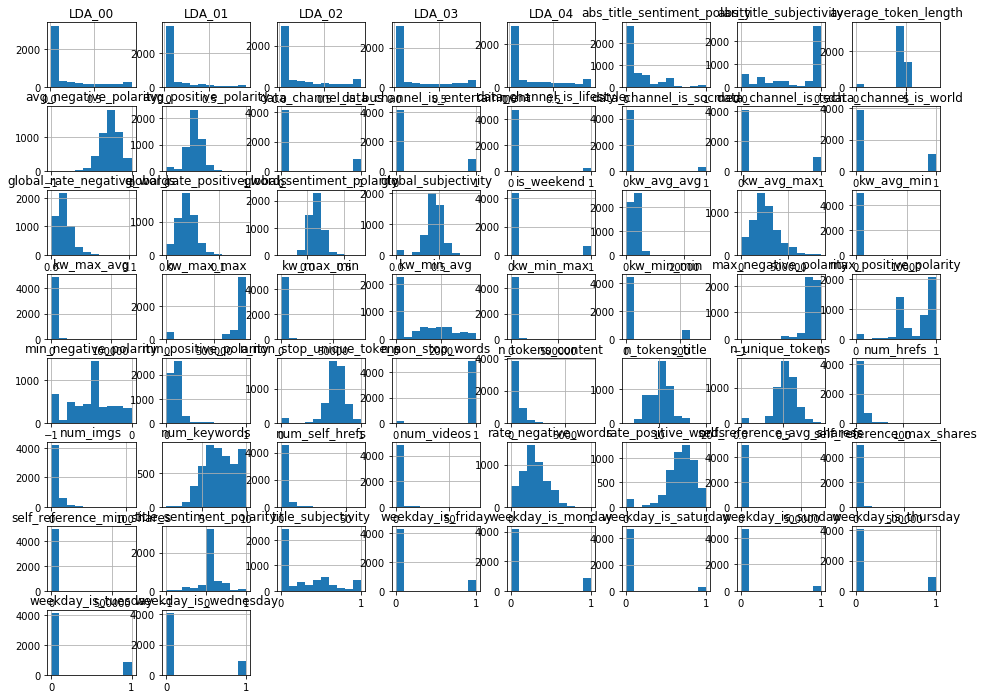

In [20]:
# Histograms for each attribute
x_original.hist()
pyplot.show()

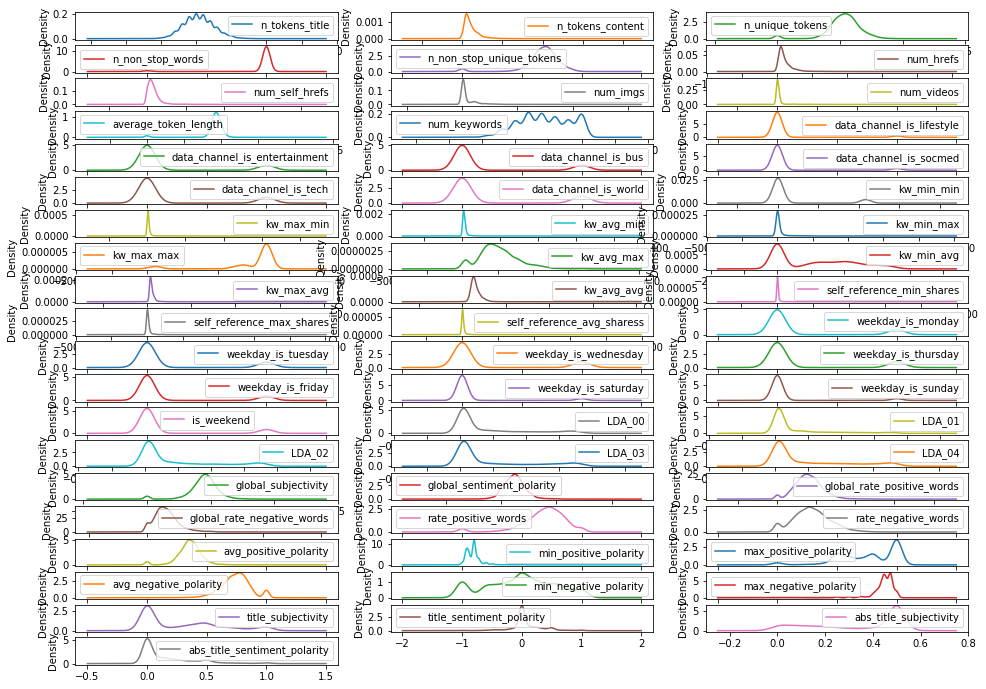

In [21]:
# Density plot for each attribute
x_original.plot(kind='density', subplots=True, layout=(dispRow,dispCol), sharex=False, sharey=False)
pyplot.show()

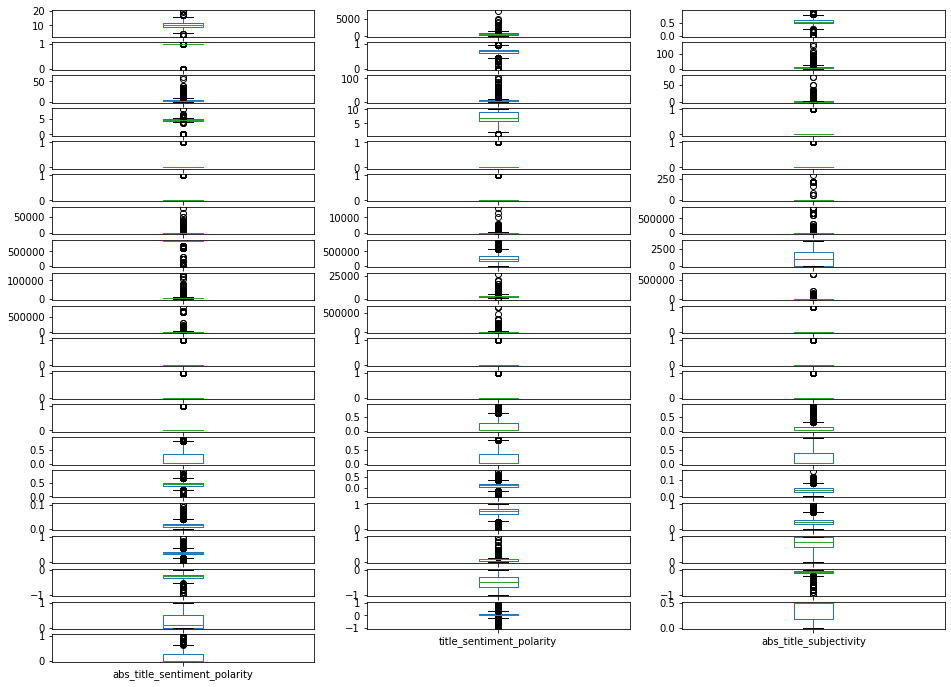

In [22]:
# Box and Whisker plot for each attribute
x_original.plot(kind='box', subplots=True, layout=(dispRow,dispCol), sharex=False, sharey=False)
pyplot.show()

In [22]:
# Scatterplot matrix
# scatter_matrix(x_original)
# pyplot.show()

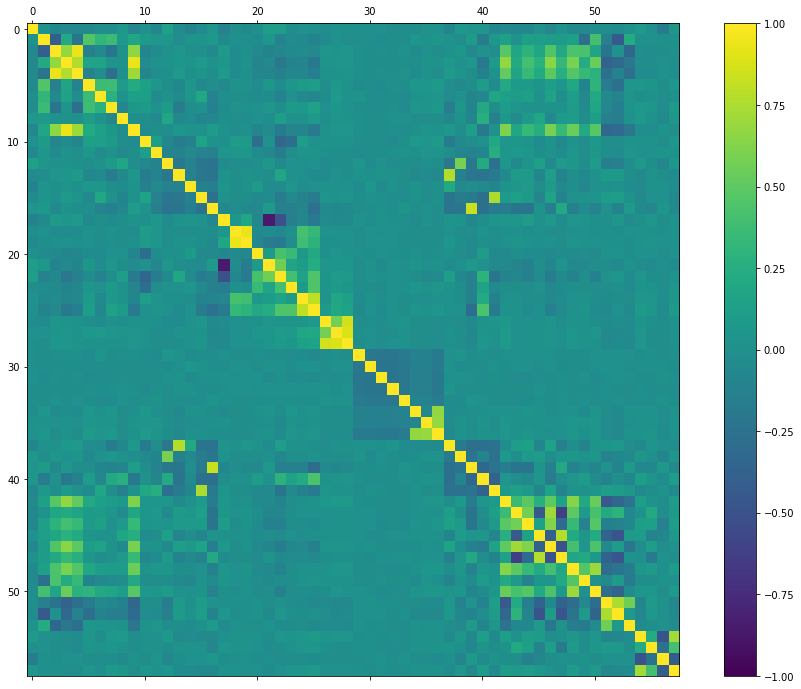

In [23]:
# Correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(x_original.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

In [24]:
# Feature Importance with Lasso
model = Lasso()
model.fit(x_train, y_train)
importanceScore = abs(model.coef_)
attributeList = xy_original.columns
attributeList = xy_original.columns.tolist()
if targetCol == totCol :
    del attributeList[-1]
else :
    del attributeList[0]
attributeImportance = pd.DataFrame({'attribute': attributeList, 'importance': importanceScore})
rankedAttributes = attributeImportance.sort_values('importance', ascending=False)
print(rankedAttributes)

                        attribute    importance
44     global_rate_positive_words  13195.914915
2                 n_unique_tokens   5701.838900
42            global_subjectivity   4182.722147
53          max_negative_polarity   2686.569919
3                n_non_stop_words   2581.102463
38                         LDA_01   1678.588424
48          avg_positive_polarity   1617.700562
4        n_non_stop_unique_tokens   1475.314044
52          min_negative_polarity   1446.369902
16          data_channel_is_world   1336.088796
49          min_positive_polarity   1268.688804
13            data_channel_is_bus   1194.785395
11      data_channel_is_lifestyle   1163.570174
56         abs_title_subjectivity   1095.774073
14         data_channel_is_socmed   1094.488152
43      global_sentiment_polarity   1081.260641
40                         LDA_03   1080.053508
51          avg_negative_polarity   1049.498865
37                         LDA_00   1002.714512
57   abs_title_sentiment_polarity    856

C:\Users\Utilizador\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 937636758.658905, tolerance: 27016907.61601052
  positive)


In [25]:
# Set the importance threshold and calculate the list of attributes that don't contribute to the importance threshold
importanceSum = sum(importanceScore)
maxThreshold = 0.99
i = 0
accumWeight = 0
exit_now = False
while ((i < totAttr) and (not exit_now)) :
    accumWeight = accumWeight + (rankedAttributes.iloc[i]['importance']/importanceSum)
    if (accumWeight >= maxThreshold) :
        exit_now = True
    else :
        i = i + 1
print('Number of attributes contributed to the importance threshold:'+str(i))
lowAttributes = rankedAttributes.iloc[(i):(totAttr),]['attribute'].tolist()
print('Number of attributes found to be of low importance:',len(lowAttributes))
print(lowAttributes)

Number of attributes contributed to the importance threshold:31
Number of attributes found to be of low importance: 27
['is_weekend', 'weekday_is_monday', 'weekday_is_wednesday', 'n_tokens_title', 'max_positive_polarity', 'num_videos', 'num_imgs', 'num_keywords', 'kw_min_min', 'kw_avg_avg', 'kw_avg_min', 'num_hrefs', 'num_self_hrefs', 'kw_min_avg', 'n_tokens_content', 'kw_max_avg', 'kw_max_min', 'self_reference_avg_sharess', 'self_reference_min_shares', 'self_reference_max_shares', 'kw_avg_max', 'kw_min_max', 'kw_max_max', 'weekday_is_sunday', 'rate_positive_words', 'LDA_04', 'global_rate_negative_words']


In [26]:
# Removing the unselected attributes from the training and validation dataframes
#xy_train <- xy_train[, !(names(xy_train) %in% lowAttributes)]
#xy_test <- xy_test[, !(names(xy_test) %in% lowAttributes)]
xy_newdf = xy_original.drop(lowAttributes, axis=1)

totCol = len(xy_newdf.columns)
totAttr = totCol-1
targetCol = totCol
array = xy_newdf.values

if targetCol == totCol :
    x_newdf = array[:,0:totAttr]
    y_newdf = array[:,totAttr]
else :
    x_newdf = array[:,1:totCol]
    y_newdf = array[:,0]

validation_size = 0.30
x_train, x_test, y_train, y_test = train_test_split(x_newdf, y_newdf, test_size=validation_size, random_state=seedNum)
print("x_newdf.shape: {} y_newdf.shape: {}".format(x_newdf.shape, y_newdf.shape))
print("x_train.shape: {} y_train.shape: {}".format(x_train.shape, y_train.shape))
print("x_test.shape: {} y_test.shape: {}".format(x_test.shape, y_test.shape))

x_newdf.shape: (4999, 31) y_newdf.shape: (4999,)
x_train.shape: (3499, 31) y_train.shape: (3499,)
x_test.shape: (1500, 31) y_test.shape: (1500,)


In [27]:
print('Data handling time:',(datetime.now() - startTimeScript))

Data handling time: 0:02:39.942124


In [28]:
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'neg_mean_squared_error'

In [29]:
# Set up Algorithms Spot-Checking Array
models = []
models.append(('LR', LinearRegression()))
models.append(('RR', Ridge(random_state=seedNum)))
models.append(('LASSO', Lasso(random_state=seedNum)))
models.append(('EN', ElasticNet(random_state=seedNum)))
models.append(('CART', DecisionTreeRegressor(random_state=seedNum)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVM', SVR()))
models.append(('RF', RandomForestRegressor(random_state=seedNum)))
models.append(('GBM', GradientBoostingRegressor(random_state=seedNum)))
results = []
names = []
metrics = []

In [30]:
# Generate model in turn
for name, model in models:
	startTimeModule = datetime.now()
	kfold = KFold(n_splits=num_folds, random_state=seedNum)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	metrics.append(cv_results.mean())
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
	print ('Model training time:',(datetime.now() - startTimeModule))

LR: -76225966.777636 (44800576.845514)
Model training time: 0:00:00.064125
RR: -76187447.444247 (44845208.887946)
Model training time: 0:00:00.018949
LASSO: -76212761.577537 (44857025.619555)
Model training time: 0:00:00.098243
EN: -76663620.854903 (45424535.919279)
Model training time: 0:00:00.023936
CART: -156137561.041183 (80745218.741023)
Model training time: 0:00:00.747601
KNN: -89791013.851546 (43308190.456630)
Model training time: 0:00:00.405350


C:\Users\Utilizador\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Utilizador\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Utilizador\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Utilizador\Anaconda3\lib\site-packages\sklearn\svm\base

SVM: -81128362.514111 (46992240.398849)
Model training time: 0:00:05.314579


C:\Users\Utilizador\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Utilizador\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Utilizador\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Utilizador\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Utilizador\Anaconda3\lib\site-packages\sklearn\

RF: -99563896.490238 (44671565.858622)
Model training time: 0:00:04.377714
GBM: -85507290.728857 (48800590.291735)
Model training time: 0:00:03.382916


In [31]:
print('Average metrics ('+scoring+') from all models:',np.mean(metrics))
print('Average error from all models:',math.sqrt(abs(np.mean(metrics))))

Average metrics (neg_mean_squared_error) from all models: -159746763.94219485
Average error from all models: 12639.096642647957


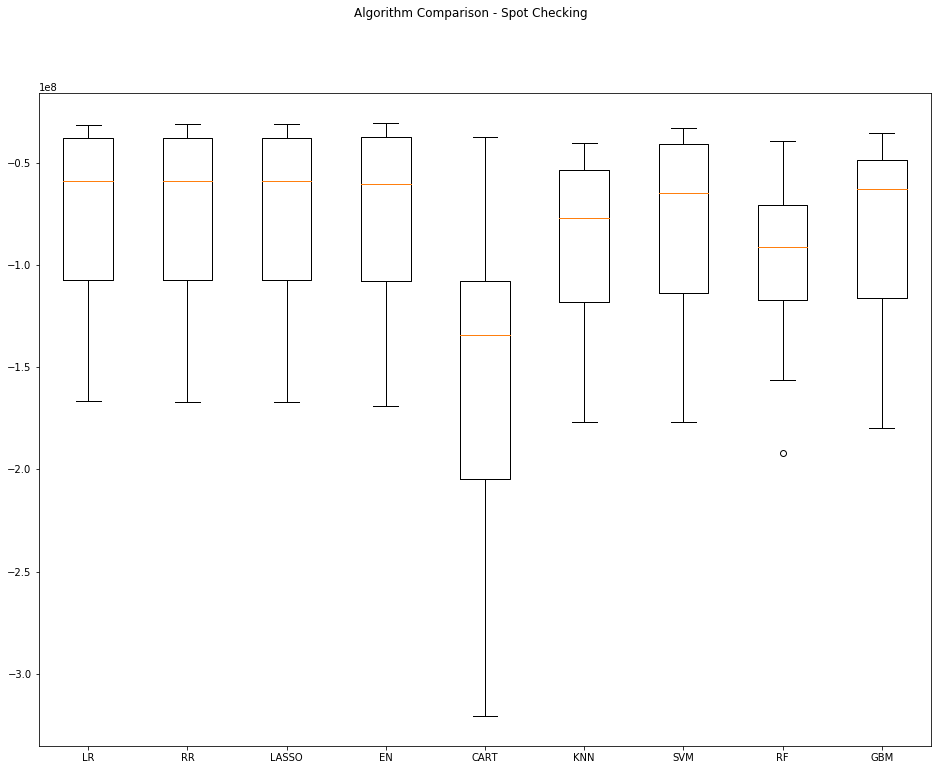

In [31]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()



In [33]:
# Set up the comparison array
results = []
names = []

In [32]:
# Tuning algorithm #1 - ElasticNet
startTimeModule = datetime.now()
paramGrid1 = dict(alpha=np.array([1,2,3]))
model1 = ElasticNet(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid1 = GridSearchCV(estimator=model1, param_grid=paramGrid1, scoring=scoring, cv=kfold)
grid_result1 = grid1.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))
results.append(grid_result1.cv_results_['mean_test_score'])
names.append('EN')
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print ('Model training time:',(datetime.now() - startTimeModule))

Best: -76670175.121357 using {'alpha': 1}
-76670175.121357 (45429371.744503) with: {'alpha': 1}
-76878399.737746 (45482641.300582) with: {'alpha': 2}
-76973665.521556 (45508182.561064) with: {'alpha': 3}
Model training time: 0:00:00.058842


In [36]:
# Tuning algorithm #2 - Stochastic Gradient Boosting
startTimeModule = datetime.now()
paramGrid2 = dict(n_estimators=np.array([100,200,300,400]))
model2 = GradientBoostingRegressor(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)
grid_result2 = grid2.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
results.append(grid_result2.cv_results_['mean_test_score'])
names.append('GBM')
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print ('Model training time:',(datetime.now() - startTimeModule))

C:\Users\Utilizador\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: -85514667.005830 using {'n_estimators': 100}
-85514667.005830 (48805612.403265) with: {'n_estimators': 100}
-92176931.848452 (49175756.443203) with: {'n_estimators': 200}
-95711335.179827 (51339213.490214) with: {'n_estimators': 300}
-98391257.264733 (52089735.706931) with: {'n_estimators': 400}
Model training time: 0:00:34.272917


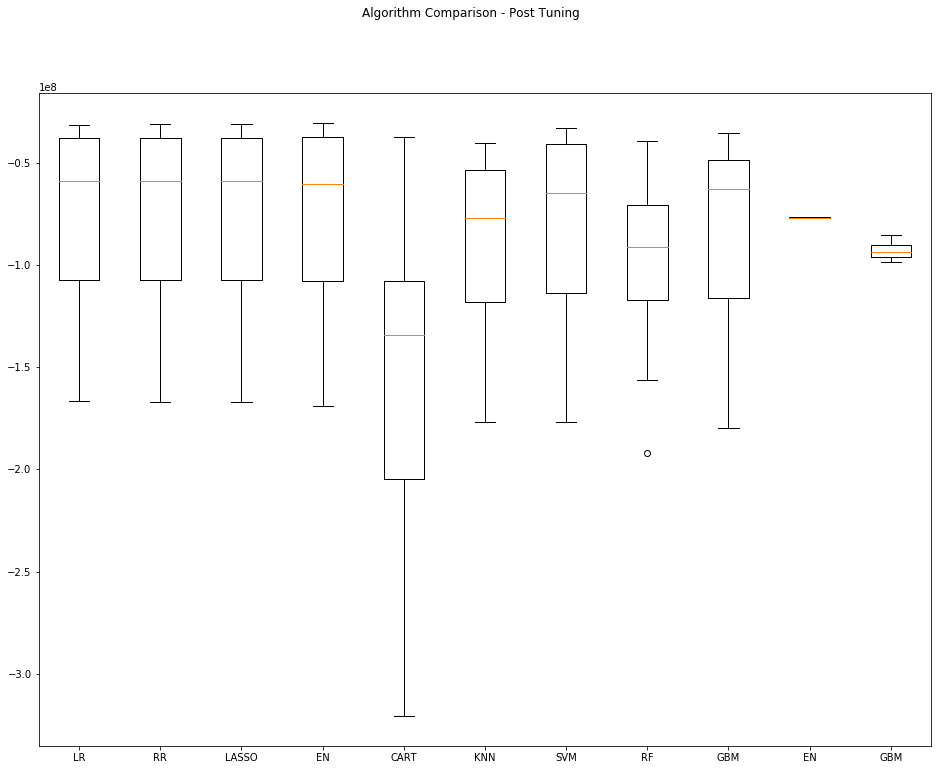

In [37]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Post Tuning')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()



In [33]:
model = ElasticNet(alpha=1, random_state=seedNum)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(mean_squared_error(y_test, predictions))

44159359.28357401


In [34]:
startTimeModule = datetime.now()
finalModel = ElasticNet(alpha=1, random_state=seedNum)
finalModel.fit(x_original, y_original)
print('Model training time:',(datetime.now() - startTimeModule))

Model training time: 0:00:00.194478


In [40]:
modelName = 'finalModel_BinaryClass.sav'
dump(finalModel, modelName)


print('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 1:33:29.692685


In [35]:
predictions

array([3712.99306777, 3291.31260105, 3228.31761831, ..., 3769.9199945 ,
       3990.8483315 , 3925.46030254])